# Dataset

Paper: [Sokoto Coventry Fingerprint Dataset](https://arxiv.org/abs/1807.10609)\
Dataset: https://www.kaggle.com/datasets/ruizgara/socofing

### Dataset structure

* Altered
    * Altered-Easy
    * Altered-Hard
    * Altered-Medium
* Real

In [1]:
!ls ../SOCOFing/Real | wc -l

6000


In [2]:
!ls ../SOCOFing/Altered/Altered-Easy | wc -l

17931


In [3]:
!ls ../SOCOFing/Altered/Altered-Medium | wc -l

17067


In [4]:
!ls ../SOCOFing/Altered/Altered-Hard | wc -l

14272


### File format

“<1>\_<2>\_<3>\_<4>\_<5>.bmp”

1. Identifies the number of the subject: 001 to 600;
2. Indicates the gender of the subject: M – male, F – female;
3. Denotes the hand: Left or Right;
4. Indicates the finger name: little, ring, middle, index, or thumb;
5. Indicates the type of alteration type (altered images only): Obl – obliteration, CR – central rotation, or Zcut;

All file images have a resolution of 1 × 96 × 103 (gray × width × height)

!! Actually there are lot of images of size 298 × 241

In [5]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from PIL import Image

In [6]:
def parse_socofing(files):
    shape = (128, 128)
    X = []
    y = []
    for i, file in enumerate(files):
        image = Image.open(file).resize(shape)
        X.append(np.array(image))
        y.append(int(file.name[0 : file.name.find("_")]))
    return X, y

In [7]:
def imshow(images, labels):
    fig, axeslist = plt.subplots(ncols=len(images), nrows=1)
    for i in range(len(images)):
        axeslist.ravel()[i].imshow(images[i], cmap=plt.gray())
        axeslist.ravel()[i].set_title(labels[i])
        axeslist.ravel()[i].set_axis_off()
    plt.tight_layout()

In [8]:
X_real, y_real = parse_socofing(list(Path("../SOCOFing/Real").rglob("*.BMP")))

6000


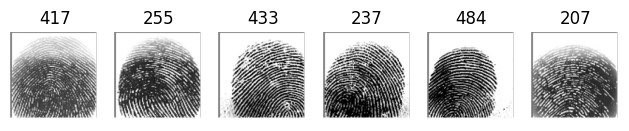

In [9]:
print(len(X_real))
imshow(X_real[0:6], y_real[0:6])

In [10]:
X_alt_easy, y_alt_easy = parse_socofing(
    list(Path("../SOCOFing/Altered/Altered-Easy").rglob("*.BMP"))
)

17931


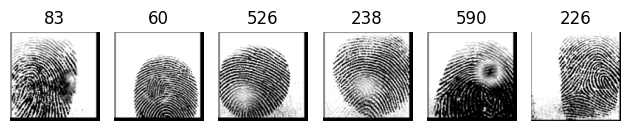

In [11]:
print(len(X_alt_easy))
imshow(X_alt_easy[0:6], y_alt_easy[0:6])

In [12]:
X_alt_medium, y_alt_medium = parse_socofing(
    list(Path("../SOCOFing/Altered/Altered-Medium").rglob("*.BMP"))
)

17067


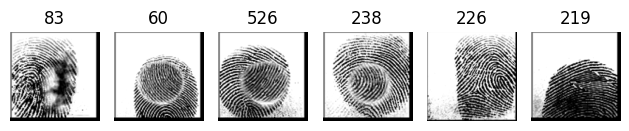

In [13]:
print(len(X_alt_medium))
imshow(X_alt_medium[0:6], y_alt_medium[0:6])

In [14]:
X_alt_hard, y_alt_hard = parse_socofing(
    list(Path("../SOCOFing/Altered/Altered-Hard").rglob("*.BMP"))
)

14272


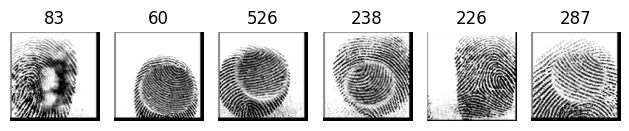

In [15]:
print(len(X_alt_hard))
imshow(X_alt_hard[0:6], y_alt_hard[0:6])